# Limpieza del documento emociones

## 1 - Importación y lectura del df

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_json('/content/emocion.json')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [3]:
#Ejecuto el documento para ver cómo está dividido el df. Veo que las columnas son cada una de las fotografías y que en las filas tenemos información de cada una de ellas.

df

,Training_10118481.jpg,Training_10120469.jpg,Training_10131352.jpg,Training_10161559.jpg,Training_1021836.jpg,Training_10269675.jpg,Training_10278738.jpg,Training_10290703.jpg,Training_10295477.jpg,Training_10315441.jpg,...,PublicTest_97429032.jpg,PublicTest_97536839.jpg,PublicTest_97902387.jpg,PublicTest_97957698.jpg,PublicTest_97995446.jpg,PublicTest_98089595.jpg,PublicTest_98567249.jpg,PublicTest_98972870.jpg,PublicTest_99242645.jpg,PublicTest_99446963.jpg
t_id,Training_10118481.jpg,Training_10120469.jpg,Training_10131352.jpg,Training_10161559.jpg,Training_1021836.jpg,Training_10269675.jpg,Training_10278738.jpg,Training_10290703.jpg,Training_10295477.jpg,Training_10315441.jpg,...,PublicTest_97429032.jpg,PublicTest_97536839.jpg,PublicTest_97902387.jpg,PublicTest_97957698.jpg,PublicTest_97995446.jpg,PublicTest_98089595.jpg,PublicTest_98567249.jpg,PublicTest_98972870.jpg,PublicTest_99242645.jpg,PublicTest_99446963.jpg
emocion,angry,angry,angry,angry,angry,angry,angry,angry,angry,angry,...,surprise,surprise,surprise,surprise,surprise,surprise,surprise,surprise,surprise,surprise
tiempo_recogida,291,425,499,715,301,415,458,104,184,221,...,42,656,253,41,543,469,299,255,573,466


## 2 - Limpieza del df



### Ordenar el df y confirmar que los valores son del tipo correcto

In [4]:
#Para confirmar, veo qué valores toma el df como columnas
df.columns

Index(['Training_10118481.jpg', 'Training_10120469.jpg',
       'Training_10131352.jpg', 'Training_10161559.jpg',
       'Training_1021836.jpg', 'Training_10269675.jpg',
       'Training_10278738.jpg', 'Training_10290703.jpg',
       'Training_10295477.jpg', 'Training_10315441.jpg',
       ...
       'PublicTest_97429032.jpg', 'PublicTest_97536839.jpg',
       'PublicTest_97902387.jpg', 'PublicTest_97957698.jpg',
       'PublicTest_97995446.jpg', 'PublicTest_98089595.jpg',
       'PublicTest_98567249.jpg', 'PublicTest_98972870.jpg',
       'PublicTest_99242645.jpg', 'PublicTest_99446963.jpg'],
      dtype='object', length=35885)

In [5]:
#Busco la info para ver las columnas y qué tipos de datos tenemos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, t_id to tiempo_recogida
Columns: 35885 entries, Training_10118481.jpg to PublicTest_99446963.jpg
dtypes: object(35885)
memory usage: 841.1+ KB


In [6]:
#Considero que tenemos que poner las filas como columnas y cada una de las imágenes como filas.
#Por ello, voy a usar la función 'transpose' para darle la vuelta
df_transpuesto = df.transpose()
df_transpuesto.head()

,t_id,emocion,tiempo_recogida
Training_10118481.jpg,Training_10118481.jpg,angry,291
Training_10120469.jpg,Training_10120469.jpg,angry,425
Training_10131352.jpg,Training_10131352.jpg,angry,499
Training_10161559.jpg,Training_10161559.jpg,angry,715
Training_1021836.jpg,Training_1021836.jpg,angry,301


In [7]:
#Una vez transpuesto, vamos a ver cuántas columnas y filas hay ahora.
df.shape

(3, 35885)

In [8]:
#Confirmo qué columnas tiene el df_transpuesto.
df_transpuesto.columns

Index(['t_id', 'emocion', 'tiempo_recogida'], dtype='object')

In [9]:
#Veo que toma como índice el nombre de las imágenes, y que tenemos este dato duplicado. Vamos a sustituirlo por un índice numérico.
df_transpuesto = df_transpuesto.reset_index(drop=True)
df_transpuesto.head()

,t_id,emocion,tiempo_recogida
0,Training_10118481.jpg,angry,291
1,Training_10120469.jpg,angry,425
2,Training_10131352.jpg,angry,499
3,Training_10161559.jpg,angry,715
4,Training_1021836.jpg,angry,301


In [10]:
#De nuevo, voy a imprimir la información de este nuevo df_transpuesto.
df_transpuesto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35885 entries, 0 to 35884
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   t_id             35885 non-null  object
 1   emocion          35534 non-null  object
 2   tiempo_recogida  35885 non-null  object
dtypes: object(3)
memory usage: 841.2+ KB


In [11]:
#Veo que la columna 'tiempo_recogida' está como un string en la info, por lo que voy comprobarlo preguntándole el tipo.
print(df_transpuesto['tiempo_recogida'].dtype)

object


In [12]:
#En este caso, voy a convertirlo a int.
df_transpuesto['tiempo_recogida']= df_transpuesto['tiempo_recogida'].astype(int)

In [13]:
#ejecuto de nuevo la información y compruebo el cambio.
df_transpuesto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35885 entries, 0 to 35884
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   t_id             35885 non-null  object
 1   emocion          35534 non-null  object
 2   tiempo_recogida  35885 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


### Comprobación de nulos

In [26]:
#ahora vamos a confirmar si hay algún nulo. Vemos que hay 351 nulos en emoción
df_transpuesto.isnull().sum()

,0
t_id,0
emocion,351
tiempo_recogida,0


In [29]:
print("Suma total de las emociones:")
df_transpuesto["emocion"].value_counts().sum()

Suma total de las emociones:


np.int64(35534)

In [30]:
#Vamos a ver si coinciden los nulos con la resta de total de columnas - total emociones. Efectivamente coincide que hay 351 nulos.
35885-35534

351

In [31]:
#Vemos cuánto supone en porcetaje estos nulos para decidir qué hacemos con ellos.
f"Porcentaje de nulos sobre columna 'emocion': {round(351/35885 * 100, 1)}%"

"Porcentaje de nulos sobre columna 'emocion': 1.0%"

In [32]:
#mantenemos una copia del df con los nulos por si acaso
df_nulos = df_transpuesto
df_nulos.head()

,t_id,emocion,tiempo_recogida
0,Training_10118481.jpg,angry,291
1,Training_10120469.jpg,angry,425
2,Training_10131352.jpg,angry,499
3,Training_10161559.jpg,angry,715
4,Training_1021836.jpg,angry,301


In [35]:
#Al ser solo un 1% de la información, decidimos eliminar estas filas con nulos.
df_transpuesto = df_transpuesto[df_transpuesto['emocion'].notna()]
df_transpuesto.isnull().sum()

,0
t_id,0
emocion,0
tiempo_recogida,0


In [36]:
#Y efectivamente comprobamos que se han borrado esas 351 columnas
df_transpuesto.shape

(35534, 3)

### Transformación 'tiempo_recogida' a fechas concretas

In [37]:
df_transpuesto.head()

,t_id,emocion,tiempo_recogida
0,Training_10118481.jpg,angry,291
1,Training_10120469.jpg,angry,425
2,Training_10131352.jpg,angry,499
3,Training_10161559.jpg,angry,715
4,Training_1021836.jpg,angry,301


**tiempo_recogida**: unidad de tiempo (número entero) que representa el momento en
que se toma la fotografía contando el número de horas que han pasado desde las 07:00
del 1 de septiembre de 2022. Por ejemplo, si este campo indica un 8 significa que la
fotografía se tomó a las 15:00 (07:00 más 8 horas) del 1 de septiembre; mientras que si
indica un 25 significa que se tomó a las 08:00 del 2 de septiembre de 2022 (25 horas
después del momento de referencia).

In [38]:
from datetime import datetime, timedelta
#import datetime, timedelta: Importa específicamente dos clases (o tipos de objetos) del módulo datetime:
#datetime: Una clase para representar una fecha y hora específica (ej. "2022-09-01 07:00:00").
#timedelta: Una clase para representar una diferencia de tiempo (ej. 291 horas).
#Esto nos permite usar datetime y timedelta directamente en el código sin escribir datetime.datetime o datetime.timedelta

In [39]:
#Vamos a convertir el 'tiempo_recogida' en un formato legible.
#Ponemos como fecha base el 1 de septiembre de 2022 a las 7:00h.
fecha_base = datetime (2022,9,1,7,0)
df_transpuesto['fecha_hora'] = df_transpuesto['tiempo_recogida'].apply(lambda x: fecha_base + timedelta(hours=int(x)))
df_transpuesto.head()

<ipython-input-39-137cd3b35af3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transpuesto['fecha_hora'] = df_transpuesto['tiempo_recogida'].apply(lambda x: fecha_base + timedelta(hours=int(x)))


,t_id,emocion,tiempo_recogida,fecha_hora
0,Training_10118481.jpg,angry,291,2022-09-13 10:00:00
1,Training_10120469.jpg,angry,425,2022-09-19 00:00:00
2,Training_10131352.jpg,angry,499,2022-09-22 02:00:00
3,Training_10161559.jpg,angry,715,2022-10-01 02:00:00
4,Training_1021836.jpg,angry,301,2022-09-13 20:00:00


In [40]:
df_transpuesto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35534 entries, 0 to 35884
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   t_id             35534 non-null  object        
 1   emocion          35534 non-null  object        
 2   tiempo_recogida  35534 non-null  int64         
 3   fecha_hora       35534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.4+ MB


In [43]:
#Hago lo mismo con el doc con nulos
fecha_base = datetime (2022,9,1,7,0)
df_nulos['fecha_hora'] = df_nulos['tiempo_recogida'].apply(lambda x: fecha_base + timedelta(hours=int(x)))
df_nulos.head()

,t_id,emocion,tiempo_recogida,fecha_hora
0,Training_10118481.jpg,angry,291,2022-09-13 10:00:00
1,Training_10120469.jpg,angry,425,2022-09-19 00:00:00
2,Training_10131352.jpg,angry,499,2022-09-22 02:00:00
3,Training_10161559.jpg,angry,715,2022-10-01 02:00:00
4,Training_1021836.jpg,angry,301,2022-09-13 20:00:00


## 3 - Descarga del documento limpio

In [ ]:
#Me descargo el csv con la columna de las fechas
df_transpuesto.to_csv("emociones_limpio.csv",index=False)

In [ ]:
df_sin_fechas = df_transpuesto.drop(['fecha_hora'], axis=1)
df_sin_fechas.head()

,t_id,emocion,tiempo_recogida
0,Training_10118481.jpg,angry,291
1,Training_10120469.jpg,angry,425
2,Training_10131352.jpg,angry,499
3,Training_10161559.jpg,angry,715
4,Training_1021836.jpg,angry,301


In [ ]:
#Me descargo el csv sin la columna de las fechas
df_sin_fechas.to_csv("emociones_limpio_sin_fechas.csv",index=False)

In [44]:
#Me descargo el df sin nulos, de la copia que hemos hecho antes, con las fechas
df_nulos.to_csv("emociones_limpio_con_nulos.csv",index=False)

In [47]:
df_sin_fechas_nulos = df_nulos.drop(['fecha_hora'], axis=1)
df_sin_fechas_nulos.head()

,t_id,emocion,tiempo_recogida
0,Training_10118481.jpg,angry,291
1,Training_10120469.jpg,angry,425
2,Training_10131352.jpg,angry,499
3,Training_10161559.jpg,angry,715
4,Training_1021836.jpg,angry,301


In [48]:
#Me descargo el df sin nulos, de la copia que hemos hecho antes, sin las fechas
df_sin_fechas_nulos.to_csv("emociones_limpio_con_nulos_sin_fechas.csv",index=False)

## 4 - Visualización


<Axes: title={'center': 'Horas en que se tomaron las fotografías'}, xlabel='emocion'>

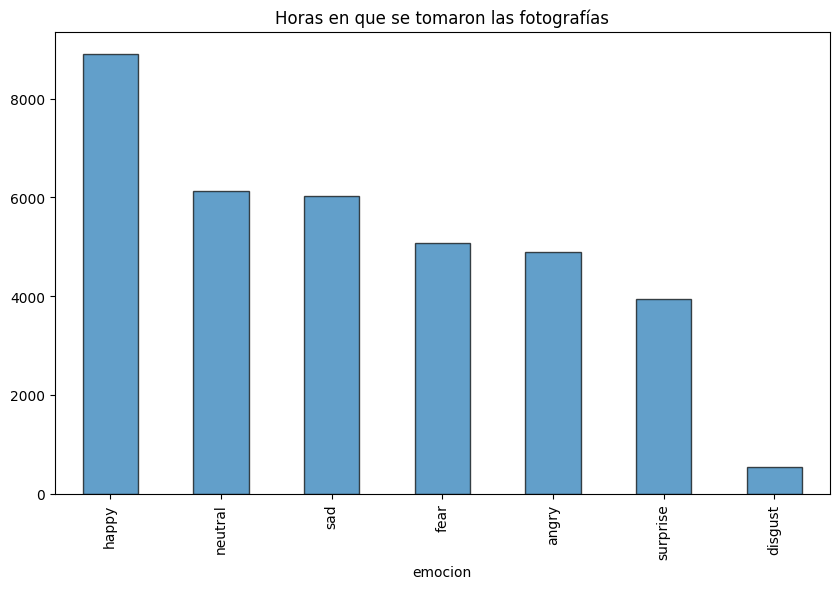

In [ ]:
df_transpuesto["emocion"].value_counts().plot(kind='bar',figsize=(10, 6), title= 'Conteo de emociones',edgecolor='black', alpha=0.7)

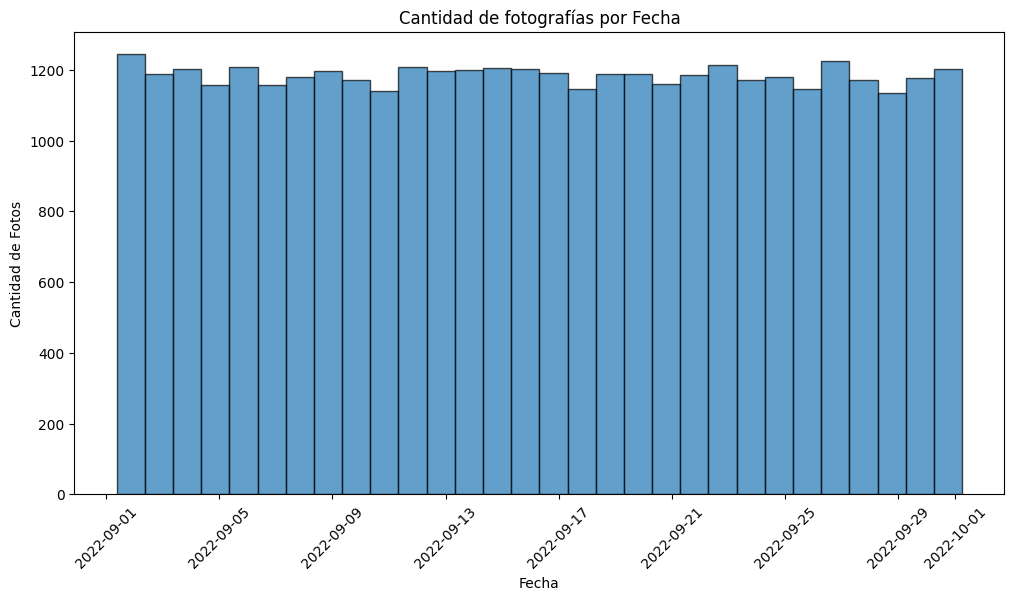

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(df_transpuesto["fecha_hora"], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Fotos")
plt.title("Cantidad de fotografías por Fecha")
plt.xticks(rotation=45)  # Rotar etiquetas para legibilidad
plt.show()